In [409]:
# 1. 데이터 수집

import pandas as pd

path = "/content/housing_data.csv"

raw = pd.read_csv(path, header=None, sep=',')
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV', 'isHighValue']
raw.columns = col_names
df = raw.copy()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1


In [410]:
# 2. 데이터 전처리
df.shape

(526, 15)

In [411]:
# 결측치 확인
df.isnull().sum()

CRIM           20
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
MEDV            0
isHighValue     0
dtype: int64

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           526 non-null    float64
 2   INDUS        526 non-null    float64
 3   CHAS         526 non-null    int64  
 4   NOX          526 non-null    float64
 5   RM           526 non-null    float64
 6   AGE          526 non-null    float64
 7   DIS          526 non-null    float64
 8   RAD          526 non-null    int64  
 9   TAX          526 non-null    float64
 10  PTRATIO      526 non-null    float64
 11  B            526 non-null    float64
 12  LSTAT        526 non-null    float64
 13  MEDV         526 non-null    float64
 14  isHighValue  526 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 61.8 KB


In [413]:
# 요약통계량 describe()
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue
count,506.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,3.613524,10.931559,11.306616,0.066540,0.555954,6.271076,68.816540,3.742880,9.416350,410.547529,18.513308,357.888099,12.721578,22.374525,0.250951
std,8.601545,22.977112,6.934739,0.249461,0.113854,0.698140,27.868375,2.083661,8.653743,169.180818,2.147684,89.829808,7.101213,9.104400,0.433973
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.453000,5.879250,45.625000,2.101425,4.000000,279.000000,17.400000,376.057500,7.150000,16.850000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.183500,77.500000,3.095750,5.000000,334.500000,19.100000,391.955000,11.490000,21.100000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.613500,93.900000,5.112625,24.000000,666.000000,20.200000,396.397500,17.057500,24.950000,0.750000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [414]:
# 결측치 처리

# 결측치 확인
df.isnull().sum()

CRIM           20
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
MEDV            0
isHighValue     0
dtype: int64

In [415]:
df.shape

(526, 15)

In [416]:
df.shape[0]

526

In [417]:
# 결측치 비율 확인
(df.isnull().sum()) / (df.shape[0])

CRIM           0.038023
ZN             0.000000
INDUS          0.000000
CHAS           0.000000
NOX            0.000000
RM             0.000000
AGE            0.000000
DIS            0.000000
RAD            0.000000
TAX            0.000000
PTRATIO        0.000000
B              0.000000
LSTAT          0.000000
MEDV           0.000000
isHighValue    0.000000
dtype: float64

In [418]:
# 결측치 대체(중위수)

# (default) 평균값 대체
# 중위수를 쓸 것인가?

df['CRIM'].mean()

3.613523557312253

In [419]:
df['CRIM'].median()

0.25651

In [420]:
df_median = df['CRIM'].median()
df['CRIM'] = df['CRIM'].fillna(df_median)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1


In [421]:
df.isnull().sum()

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
MEDV           0
isHighValue    0
dtype: int64

In [422]:
# 이상치 처리
df['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
521    22.4
522    20.6
523    23.9
524    22.0
525    11.9
Name: MEDV, Length: 526, dtype: float64

<Axes: ylabel='MEDV'>

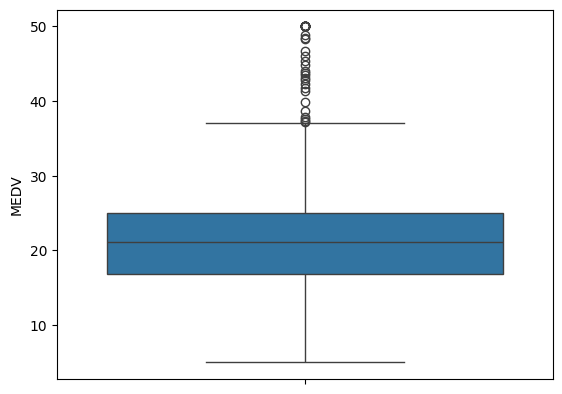

In [423]:
import seaborn as sns

sns.boxplot(df['MEDV'])

In [424]:
# IQR 기준 이상치

Q1, Q3 = df['MEDV'].quantile([0.25, 0.75])
IQR = Q3 - Q1
# print(IQR)

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
# print(upper_bound)
# print(lower_bound)

upper_condition = df['MEDV'] > upper_bound
df[upper_condition]

lower_condition = df['MEDV'] < lower_bound
df[lower_condition]

print('outlier 범위: %.2f 초과 또는 %.2f 미만'%(upper_bound, lower_bound))
print('outlier 개수 : %.0f'%len(df[upper_condition | lower_condition]))
print('outlier 비율 : %.2f'%(len(df[upper_condition | lower_condition])/len(df)))

outlier 범위: 37.10 초과 또는 4.70 미만
outlier 개수 : 37
outlier 비율 : 0.07


In [425]:
len(df)

526

In [426]:
# IQR 기준 이상치 함수 만들기

def find_outliers(df, col):
    Q1, Q3 = df['MEDV'].quantile([0.25, 0.75])
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    upper_condition = df['MEDV'] > upper_bound
    lower_condition = df['MEDV'] < lower_bound

    outliers= df[upper_condition |lower_condition]

    print('outlier 범위: %.2f 초과 또는 %.2f 미만'%(upper_bound, lower_bound))
    print('outlier 개수 : %.0f'%len(outliers))
    print('outlier 비율 : %.2f'%(len(outliers)/len(df)))

    return outliers

In [427]:
find_outliers(df, 'MEDV')

outlier 범위: 37.10 초과 또는 4.70 미만
outlier 개수 : 37
outlier 비율 : 0.07


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276.0,18.0,396.90,4.21,38.7,1
98,0.08187,0.0,2.89,0,0.4450,7.820,36.9,3.4952,2,276.0,18.0,393.53,3.57,43.8,1
157,1.22358,0.0,19.58,0,0.6050,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3,1
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403.0,14.7,374.43,1.73,50.0,1
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403.0,14.7,389.61,1.92,50.0,1
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32,50.0,1
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403.0,14.7,369.30,3.70,50.0,1
179,0.05780,0.0,2.46,0,0.4880,6.980,58.4,2.8290,3,193.0,17.8,396.90,5.04,37.2,1
180,0.06588,0.0,2.46,0,0.4880,7.765,83.3,2.7410,3,193.0,17.8,395.56,7.56,39.8,1
182,0.09103,0.0,2.46,0,0.4880,7.155,92.2,2.7006,3,193.0,17.8,394.12,4.82,37.9,1


In [428]:
# 이상치의 비율을 보여주는 함수
def get_outlier_prop(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    outliers = df[(df[column] > upper_bound) | (df[column] < lower_bound)]

    outlier_ratio = (len(outliers) / len(df)) * 100
    return f'{outlier_ratio:.1f}%'

get_outlier_prop(df,'MEDV')

'7.0%'

In [429]:
# 이상치의 비율을 보여주는 함수

def get_outlier_prop_v2(df, col):
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 -Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    upper_condition = df[col]>upper_bound
    lower_condition = df[col]<lower_bound

    print(f'{col} 의 이상치 비율 : {round(len(df[upper_condition | lower_condition]) / len(df)*100, 2)}%')

get_outlier_prop_v2(df, 'MEDV')

MEDV 의 이상치 비율 : 7.03%


In [430]:
def get_outlier_prop_v3(df):
   Q1, Q3 = df.quantile([0.25, 0.75])
   IQR = Q3 - Q1

   upper_bound = Q3 + 1.5*IQR
   lower_bound = Q1 - 1.5*IQR

   condition = (df>upper_bound)|(df<lower_bound)
   outliers = df[condition]

   return str(round(100*len(outliers)/len(df),2)) + '%'

In [431]:
df.apply(get_outlier_prop_v3)

CRIM           14.26%
ZN             12.93%
INDUS            0.0%
CHAS            6.65%
NOX              0.0%
RM               5.7%
AGE              0.0%
DIS             0.95%
RAD              0.0%
TAX              0.0%
PTRATIO         2.85%
B              15.21%
LSTAT           1.33%
MEDV            7.03%
isHighValue      0.0%
dtype: object

In [432]:
# 이상치 제거 (IQR 기준)

Q1, Q3 = df['MEDV'].quantile([0.25, 0.75])
IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

condition = (df['MEDV'] <= upper_bound ) & (df['MEDV'] >= lower_bound)
data = df[condition]
print(data.shape)
print(data[:10])

(489, 15)
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   

   PTRATIO       B  LSTAT  MEDV  isHighValue  
0     15.3  396.90   4.98  24.0            0  
1     17.8  396.90   9.14  21.6            0  
2     17.8  392.83   4.03  34.7   

In [433]:
def clean_data(df, col):
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR

    condition = (df[col] <= upper_bound ) & (df[col] >= lower_bound)
    data = df[condition]
    return data

clean_data(df, 'MEDV')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,0.25651,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,0
522,0.25651,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,0
523,0.25651,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,0
524,0.25651,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,0


In [434]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,0.25651,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,0
522,0.25651,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,0
523,0.25651,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,0
524,0.25651,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,0


In [435]:
data = clean_data(df, 'MEDV')
data.shape

(489, 15)

In [436]:
# 기준값(threshold) 존재 시, 이상치 제거
# 예를 들어, MEDV 변수 값이 45이상인 경우를 이상치로 보고 제거

outlier = (df['MEDV']>=45)
outlier_data = df[outlier]
removed_outlier = df[~outlier]
print(outlier_data.shape)
print(removed_outlier.shape)

(22, 15)
(504, 15)


In [437]:
df['MEDV'].shape

(526,)

In [438]:
# 변수 변환

# 변수 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns

data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'isHighValue'],
      dtype='object')

In [439]:
cols = data.columns

len(cols)

15

<ipython-input-440-635beb0574a6>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols[idx]], ax = ax[r][c])
<ipython-input-440-635beb0574a6>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cols[idx]], ax = ax[r][c])
<ipython-input-440-635beb0574a6>:8: UserWarning: 

`distplot` is a depre

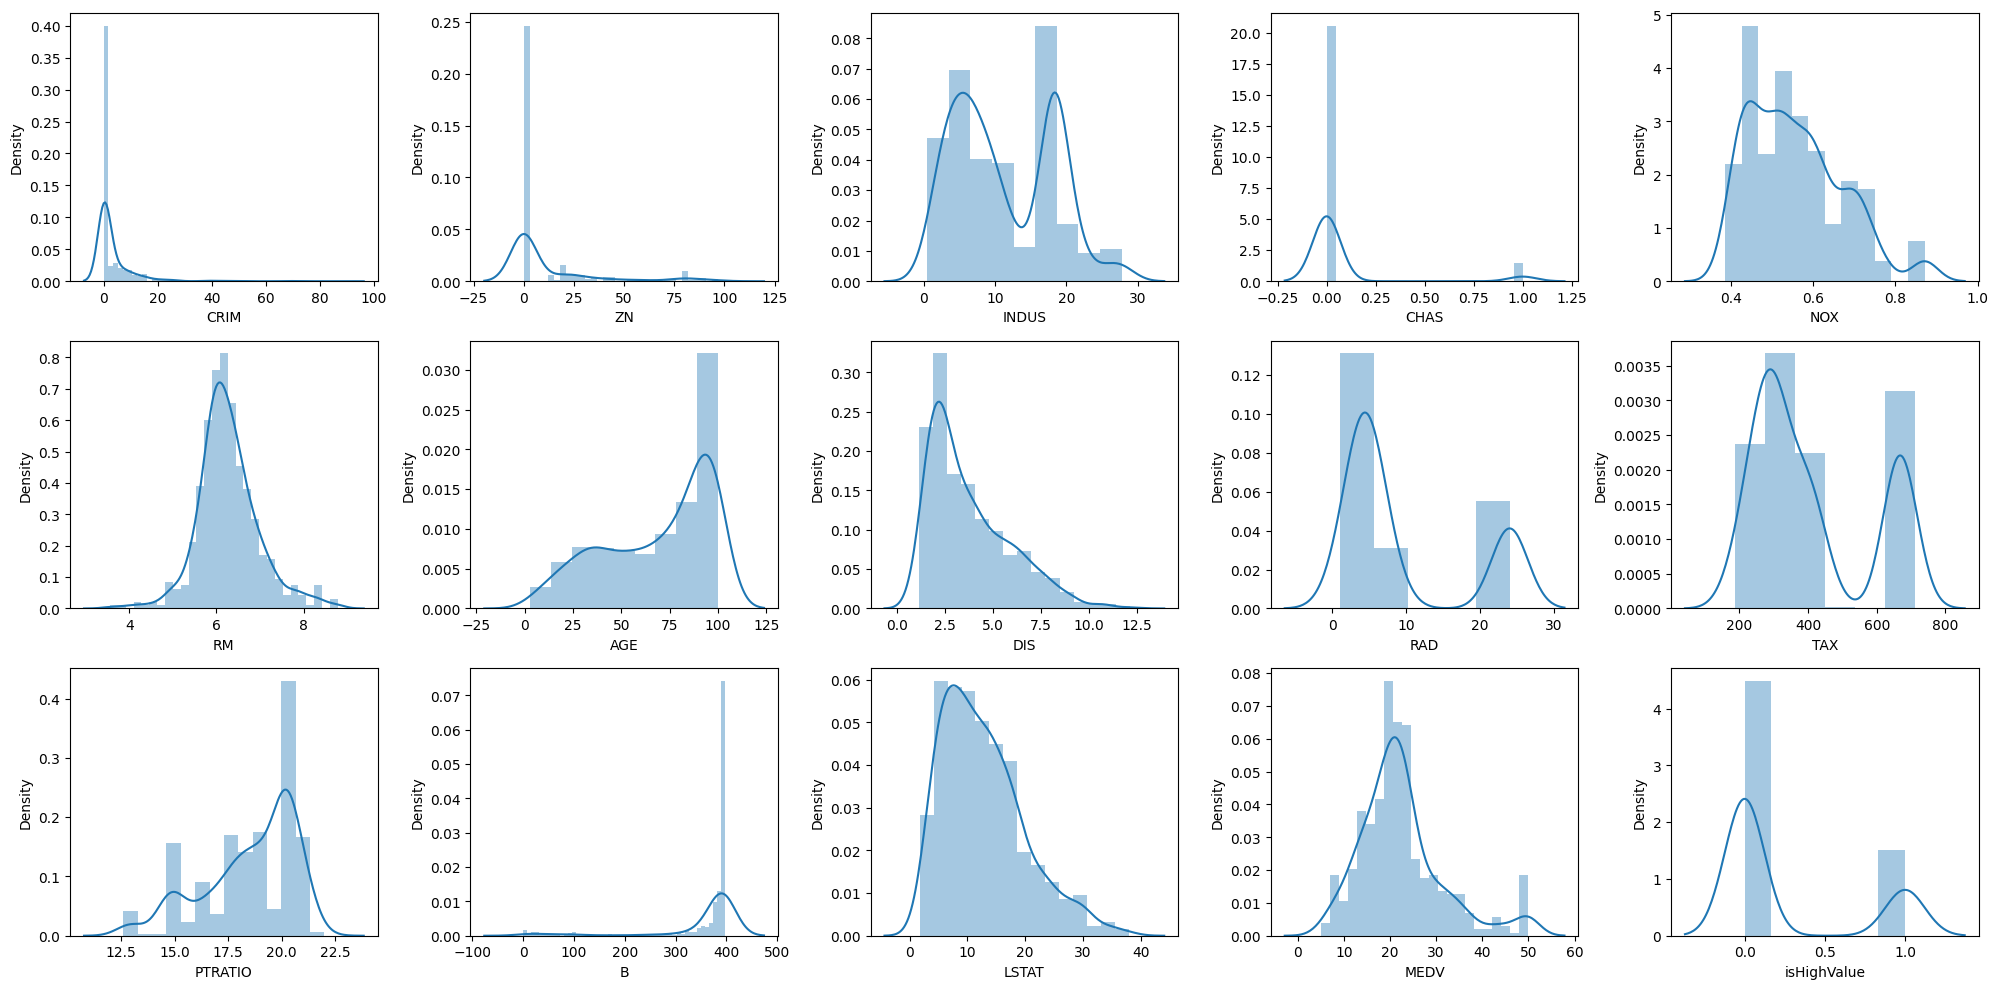

In [440]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20,10))

idx = 0  # 초기화

for r in range(3):
  for c in range(5):
    if idx < len(cols):
       sns.distplot(df[cols[idx]], ax = ax[r][c])
       idx += 1

plt.tight_layout()

In [441]:
# 변수 왜도 확인

print(df['LSTAT'].skew())
print(df['CRIM'].skew())

0.8933178202296346
5.321801755982


In [442]:
data.apply(lambda x : x.skew(), axis=0)

CRIM           5.158718
ZN             2.354004
INDUS          0.311843
CHAS           3.822908
NOX            0.704176
RM            -0.318433
AGE           -0.621499
DIS            1.056890
RAD            0.989592
TAX            0.617855
PTRATIO       -0.914858
B             -2.821286
LSTAT          0.905856
MEDV           0.177514
isHighValue    1.550232
dtype: float64

In [443]:
# 왜도(skewness: 기준이 절대값 3)
# 왜도의 절대값이 3 이상이면, 통계적으로 크게 치우졌다고 말함
# 주어진 data에서 왜도 기준에 벗어난 것은  CRIM, CHAS

# 로그변환

import numpy as np

data['CRIM'] = np.log1p(data['CRIM'])
data['CHAS'] = np.log1p(data['CHAS'])

print(data['CRIM'].skew()) # 0.8794 >> 왜도의 치우침이 개선 된 것을 확인(v)
print(data['CHAS'].skew())
# 왜 'CHAS'는 변환이 안되죠?
# >> CHAS 챨스 강 여부(1: 강변, 0: 강변 아니면) 더미변수 / 범주형 데이터
# >> log1p 는 연속형 데이터에 적용
# np.log1p : np.log1p(1): log2

1.2917818562179324
3.82290756588509


<ipython-input-443-dcfd5e471385>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CRIM'] = np.log1p(data['CRIM'])
<ipython-input-443-dcfd5e471385>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CHAS'] = np.log1p(data['CHAS'])


모델링
- 회귀 모델링

In [444]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'isHighValue'],
      dtype='object')

In [445]:
data.isHighValue # 더미변수(분류에 사용)

0      0
1      0
2      1
3      1
4      1
      ..
521    0
522    0
523    0
524    0
525    0
Name: isHighValue, Length: 489, dtype: int64

In [446]:
data_r = data.drop(['isHighValue'], axis=1)
data_r

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006300,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.026944,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.026924,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.031857,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.066770,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,0.228338,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
522,0.228338,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
523,0.228338,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
524,0.228338,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [447]:
data_r.shape

(489, 14)

In [448]:
data_r.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [449]:
data_r.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.336051,0.612368,-0.038832,0.691725,-0.262893,0.544793,-0.565959,0.895844,0.823502,0.362681,-0.513446,0.611886,-0.606428
ZN,-0.336051,1.000000,-0.531075,-0.050441,-0.517043,0.327856,-0.558493,0.690195,-0.294717,-0.300599,-0.387436,0.167829,-0.422762,0.438367
INDUS,0.612368,-0.531075,1.000000,0.029886,0.752880,-0.378918,0.645649,-0.722895,0.556620,0.717903,0.375533,-0.341399,0.618336,-0.616556
CHAS,-0.038832,-0.050441,0.029886,1.000000,0.087969,0.063647,0.073263,-0.077703,-0.030157,-0.070629,-0.125461,0.040498,-0.009736,0.098557
NOX,0.691725,-0.517043,0.752880,0.087969,1.000000,-0.315022,0.725201,-0.772206,0.596943,0.657197,0.191138,-0.375020,0.604919,-0.570185
RM,-0.262893,0.327856,-0.378918,0.063647,-0.315022,1.000000,-0.274215,0.282162,-0.159779,-0.249442,-0.228444,0.091639,-0.587087,0.575942
AGE,0.544793,-0.558493,0.645649,0.073263,0.725201,-0.274215,1.000000,-0.737827,0.436794,0.504226,0.284256,-0.275303,0.643506,-0.566349
DIS,-0.565959,0.690195,-0.722895,-0.077703,-0.772206,0.282162,-0.737827,1.000000,-0.473444,-0.539587,-0.278878,0.289690,-0.550120,0.449426
RAD,0.895844,-0.294717,0.556620,-0.030157,0.596943,-0.159779,0.436794,-0.473444,1.000000,0.884083,0.428953,-0.445367,0.487788,-0.488826
TAX,0.823502,-0.300599,0.717903,-0.070629,0.657197,-0.249442,0.504226,-0.539587,0.884083,1.000000,0.432522,-0.431275,0.554569,-0.591217


In [450]:
data_r.corr().MEDV.sort_values(ascending=False)

MEDV       1.000000
RM         0.575942
DIS        0.449426
ZN         0.438367
B          0.390294
CHAS       0.098557
RAD       -0.488826
PTRATIO   -0.491928
AGE       -0.566349
NOX       -0.570185
TAX       -0.591217
CRIM      -0.606428
INDUS     -0.616556
LSTAT     -0.772650
Name: MEDV, dtype: float64

In [451]:
abs(data_r.corr().MEDV.sort_values(ascending=False)).sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.772650
INDUS      0.616556
CRIM       0.606428
TAX        0.591217
RM         0.575942
NOX        0.570185
AGE        0.566349
PTRATIO    0.491928
RAD        0.488826
DIS        0.449426
ZN         0.438367
B          0.390294
CHAS       0.098557
Name: MEDV, dtype: float64

In [452]:
sorted_data_corr = abs(data_r.corr().MEDV.sort_values(ascending=False)).sort_values(ascending=False)

In [453]:
sorted_data_corr.index

Index(['MEDV', 'LSTAT', 'INDUS', 'CRIM', 'TAX', 'RM', 'NOX', 'AGE', 'PTRATIO',
       'RAD', 'DIS', 'ZN', 'B', 'CHAS'],
      dtype='object')

In [454]:
data_r.shape

(489, 14)

In [455]:
data_r[:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006300,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.026944,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.026924,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.031857,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.066770,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.029413,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.084608,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.135012,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.191645,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.157038,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [456]:
# 상관관계 (0.4 약한 상관관계, 0.6 강한 상관관계 )

#'MEDV'(집 값의 중위수) 0.6 이상의 상관관계 변수만 추출
x_col = ['LSTAT', 'INDUS', 'CRIM', 'TAX', 'RM', 'NOX', 'AGE']

# 0.4이상의 변수 추출할 경우, x_col_v2
x_col_v2 = ['LSTAT', 'INDUS', 'CRIM', 'TAX', 'RM', 'NOX', 'AGE', 'PTRATIO',
       'RAD', 'DIS', 'ZN','B']

In [457]:
# 분석 모형 구축

# 데이터 분할 (x: 독립변수, y: 종속변수)
from sklearn.model_selection import train_test_split

x_col = ['LSTAT', 'INDUS', 'CRIM', 'TAX', 'RM', 'NOX', 'AGE']

In [458]:
data_r[x_col]

,LSTAT,INDUS,CRIM,TAX,RM,NOX,AGE
0,4.98,2.31,0.006300,296.0,6.575,0.538,65.2
1,9.14,7.07,0.026944,242.0,6.421,0.469,78.9
2,4.03,7.07,0.026924,242.0,7.185,0.469,61.1
3,2.94,2.18,0.031857,222.0,6.998,0.458,45.8
4,5.33,2.18,0.066770,222.0,7.147,0.458,54.2
...,...,...,...,...,...,...,...
521,9.67,11.93,0.228338,273.0,6.593,0.573,69.1
522,9.08,11.93,0.228338,273.0,6.120,0.573,76.7
523,5.64,11.93,0.228338,273.0,6.976,0.573,91.0
524,6.48,11.93,0.228338,273.0,6.794,0.573,89.3


In [459]:
data_r['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
521    22.4
522    20.6
523    23.9
524    22.0
525    11.9
Name: MEDV, Length: 489, dtype: float64

In [460]:
x = data_r[x_col].values
y = data_r['MEDV'].values

In [461]:
# 훈련용 / 테스트용 데이터 분할(7:3)

x_train, x_test, y_train, y_test =\
train_test_split(x, y, test_size=0.3, random_state=42)

In [462]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(342, 7)
(147, 7)
(342,)
(147,)


In [463]:
x_train

array([[2.64500000e+01, 1.81000000e+01, 2.78360284e+00, ...,
        6.15200000e+00, 7.40000000e-01, 1.00000000e+02],
       [2.94000000e+00, 2.18000000e+00, 3.18571299e-02, ...,
        6.99800000e+00, 4.58000000e-01, 4.58000000e+01],
       [2.36900000e+01, 1.81000000e+01, 3.20470388e+00, ...,
        6.38000000e+00, 6.71000000e-01, 9.62000000e+01],
       ...,
       [3.08100000e+01, 1.81000000e+01, 2.87986116e+00, ...,
        5.27700000e+00, 7.00000000e-01, 9.81000000e+01],
       [1.43600000e+01, 1.81000000e+01, 1.51922432e+00, ...,
        6.43700000e+00, 5.80000000e-01, 7.50000000e+01],
       [1.23300000e+01, 8.56000000e+00, 1.30677324e-01, ...,
        6.16700000e+00, 5.20000000e-01, 9.00000000e+01]])

In [464]:
x_test

array([[1.80600000e+01, 2.77400000e+01, 1.40509489e-01, ...,
        5.45400000e+00, 6.09000000e-01, 9.27000000e+01],
       [9.62000000e+00, 4.49000000e+00, 4.93519111e-02, ...,
        6.38900000e+00, 4.49000000e-01, 4.80000000e+01],
       [1.28700000e+01, 1.81000000e+01, 1.61709056e+00, ...,
        6.22900000e+00, 5.32000000e-01, 9.07000000e+01],
       ...,
       [1.02100000e+01, 6.91000000e+00, 1.58216688e-01, ...,
        5.68200000e+00, 4.48000000e-01, 3.38000000e+01],
       [6.58000000e+00, 8.14000000e+00, 7.19755031e-01, ...,
        5.93500000e+00, 5.38000000e-01, 2.93000000e+01],
       [2.39700000e+01, 2.77400000e+01, 1.68366300e-01, ...,
        5.41400000e+00, 6.09000000e-01, 9.83000000e+01]])

In [465]:
# 데이터 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [466]:
# (1) 선형회귀

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [467]:
# 회귀계수
lr.coef_

array([-12.63392843,  -2.32496556,  -4.86564307,  -2.55484282,
        12.93641178,   1.93357399,  -1.90354696])

In [468]:
# y절편 intercept_
lr.intercept_

21.744348557191444

In [469]:
# (2) SVM (SVR)

from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [470]:
# (3) RandomForest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [471]:
x_col

['LSTAT', 'INDUS', 'CRIM', 'TAX', 'RM', 'NOX', 'AGE']

In [472]:
# feature importance 변수 중요도

for i, value in zip(x_col, rf.feature_importances_):
    print(f'{i}: %.2f'%value)

LSTAT: 0.54
INDUS: 0.03
CRIM: 0.08
TAX: 0.03
RM: 0.24
NOX: 0.05
AGE: 0.03


분석 모델 평가 (모델 간 성능비교)

In [473]:
# 모델 활용, 예측값
lr_pred = lr.predict(x_test)
svr_pred = svr.predict(x_test)
rf_pred = rf.predict(x_test)

In [474]:
# 평가지표  계산

from sklearn.metrics import *

print('--'*100)
print('선형회귀분석 결과')
print('MAE %.2f'%mean_absolute_error(y_test, lr_pred))
print('MSE %.2f'%mean_squared_error(y_test, lr_pred))
print('MAPE %.2f'%mean_absolute_percentage_error(y_test, lr_pred))

print('--'*100)
print('SVM(SVR) 분석 결과')
print('MAE %.2f'%mean_absolute_error(y_test, svr_pred))
print('MSE %.2f'%mean_squared_error(y_test, svr_pred))
print('MAPE %.2f'%mean_absolute_percentage_error(y_test, svr_pred))

print('--'*100)
print('랜덤포레스트 분석 결과')
print('MAE %.2f'%mean_absolute_error(y_test, rf_pred))
print('MSE %.2f'%mean_squared_error(y_test, rf_pred))
print('MAPE %.2f'%mean_absolute_percentage_error(y_test, rf_pred))

# print('accuracy_score %.2f'%accuracy_score(y_test, lr_pred))
# 에러 발생 ? 왜?
# accuracy_score 는 분류 모델의 정확도 계산 함수
# No metrics support "multiclass-multioutput" format



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
선형회귀분석 결과
MAE 3.09
MSE 14.34
MAPE 0.18
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
SVM(SVR) 분석 결과
MAE 2.97
MSE 13.68
MAPE 0.16
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
랜덤포레스트 분석 결과
MAE 3.07
MSE 15.68
MAPE 0.17


In [475]:
# 위의 코드를 반복문으로 만들어 보세요.

# ji woo
preds = [lr_pred, svr_pred, rf_pred]
model_names = ['선형회귀분석', '서포트 벡터 회귀 SVM(SVR)', '랜덤 포레스트']
for pred, name in zip(preds, model_names):
  print('--'*50)
  print(f'{name} 결과')
  print('MAE %.2f' % mean_absolute_error(y_test, pred))
  print('MSE %.2f' % mean_squared_error(y_test, pred))
  print('MAPE %.2f' % mean_absolute_percentage_error(y_test, pred))


----------------------------------------------------------------------------------------------------
선형회귀분석 결과
MAE 3.09
MSE 14.34
MAPE 0.18
----------------------------------------------------------------------------------------------------
서포트 벡터 회귀 SVM(SVR) 결과
MAE 2.97
MSE 13.68
MAPE 0.16
----------------------------------------------------------------------------------------------------
랜덤 포레스트 결과
MAE 3.07
MSE 15.68
MAPE 0.17


In [476]:
# k.w.

for i in [lr, svr, rf]:
    i_pred = i.predict(x_test)
    print('--'*100)
    print('분석결과')
    print('MAE %.2f'%mean_absolute_error(y_test, i_pred))
    print('MSE %.2f'%mean_squared_error(y_test, i_pred))
    print('MAPE %.2f'%np.sqrt(mean_absolute_percentage_error(y_test, i_pred)))
    print('R2 %.2f'%r2_score(y_test, i_pred))

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
분석결과
MAE 3.09
MSE 14.34
MAPE 0.42
R2 0.66
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
분석결과
MAE 2.97
MSE 13.68
MAPE 0.40
R2 0.68
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
분석결과
MAE 3.07
MSE 15.68
MAPE 0.41
R2 0.63


In [477]:
# g.w
predictions = [('선형회귀분석', lr_pred), ('서포트 벡터 회귀', svr_pred), ('랜덤 포레스트', rf_pred)]
print('---'*100)

# 반복문을 사용하여 평가지표 계산 및 출력
for model_name, pred in predictions:
    print(f'{model_name} 결과')
    print('MSE : %.2f' % mean_squared_error(y_test, pred))
    print('MAE : %.2f' % mean_absolute_error(y_test, pred))
    print('RMSE : %.2f' % np.sqrt(mean_squared_error(y_test, pred)))
    print('---'*100)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
선형회귀분석 결과
MSE : 14.34
MAE : 3.09
RMSE : 3.79
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
서포트 벡터 회귀 결과
MSE : 13.68
MAE : 2.97
RMSE : 3.70
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
랜덤 포

In [478]:
models = {
    '선형회귀 분석 결과: ': lr_pred,
    'SVM(SVR) 분석 결과: ': svr_pred,
    '랜덤포레스트 분석 결과: ': rf_pred
}

print('-'*30)
for model_name, predictions in models.items():
    print(model_name)
    print('MAE %.2f'%mean_absolute_error(y_test, predictions))
    print('MSE %.2f'%mean_squared_error(y_test, predictions))
    print('MAPE %.2f'%mean_absolute_percentage_error(y_test, predictions))
    print('-'*30)

------------------------------
선형회귀 분석 결과: 
MAE 3.09
MSE 14.34
MAPE 0.18
------------------------------
SVM(SVR) 분석 결과: 
MAE 2.97
MSE 13.68
MAPE 0.16
------------------------------
랜덤포레스트 분석 결과: 
MAE 3.07
MSE 15.68
MAPE 0.17
------------------------------


분류 모델링

In [479]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue
0,0.006300,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0
1,0.026944,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0
2,0.026924,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1
3,0.031857,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1
4,0.066770,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,0.228338,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,0
522,0.228338,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,0
523,0.228338,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,0
524,0.228338,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,0


In [480]:
# 데이터 생성
df = data.drop(['MEDV'], axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,isHighValue
0,0.006300,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,0
1,0.026944,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,0
2,0.026924,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,1
3,0.031857,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,1
4,0.066770,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,0.228338,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,0
522,0.228338,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,0
523,0.228338,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,0
524,0.228338,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,0


<Axes: xlabel='isHighValue', ylabel='LSTAT'>

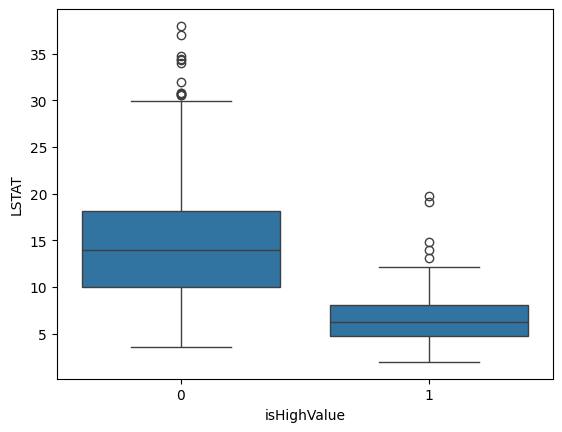

In [481]:
# LSTAT 변수 박스플롯

import seaborn as sns

sns.boxplot(x='isHighValue', y='LSTAT', data=df)

<Axes: xlabel='LSTAT', ylabel='Density'>

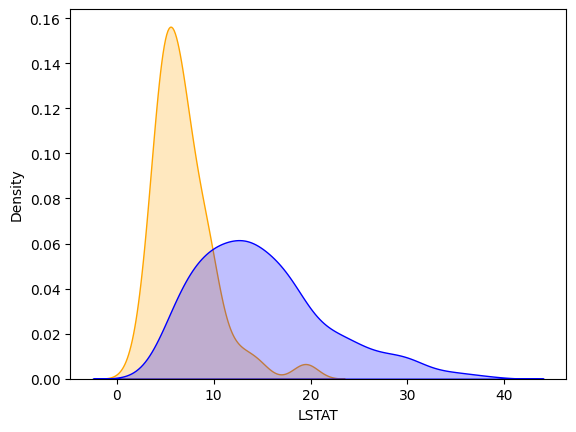

In [482]:
# LSTAT 변수 kde plot

import seaborn as sns

sns.kdeplot(df.loc[df['isHighValue']==1, 'LSTAT'], color='orange', fill=True)
sns.kdeplot(df.loc[df['isHighValue']==0, 'LSTAT'], color='blue', fill=True)

In [483]:
# isHighValue 값 별 변수 평균
import numpy as np

print(df.groupby('isHighValue').apply(np.mean))

isHighValue
0    67.089493
1    58.555122
dtype: float64


In [484]:
df.groupby('isHighValue').mean().T

isHighValue,0,1
CRIM,0.937570,0.278392
ZN,6.351523,26.031579
INDUS,12.920812,5.948737
CHAS,0.033426,0.065667
NOX,0.576558,0.483115
RM,6.023721,6.768537
AGE,73.359137,50.686316
DIS,3.534238,4.755992
RAD,10.492386,5.747368
TAX,442.220812,309.284211


In [485]:
result = df.groupby('isHighValue').mean().T
result

isHighValue,0,1
CRIM,0.937570,0.278392
ZN,6.351523,26.031579
INDUS,12.920812,5.948737
CHAS,0.033426,0.065667
NOX,0.576558,0.483115
RM,6.023721,6.768537
AGE,73.359137,50.686316
DIS,3.534238,4.755992
RAD,10.492386,5.747368
TAX,442.220812,309.284211


In [486]:
# 분석모형 구축

from sklearn.model_selection import train_test_split

df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'isHighValue'],
      dtype='object')

In [487]:
# 전체를 다 돌려서 변수 중요도 파악

x_cols =['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [488]:
df[x_cols]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006300,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.026944,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.026924,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.031857,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.066770,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,0.228338,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
522,0.228338,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
523,0.228338,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
524,0.228338,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [489]:
x = df[x_cols].values
y = df['isHighValue'].values

In [490]:
x

array([[6.30011255e-03, 1.80000000e+01, 2.31000000e+00, ...,
        1.53000000e+01, 3.96900000e+02, 4.98000000e+00],
       [2.69437354e-02, 0.00000000e+00, 7.07000000e+00, ...,
        1.78000000e+01, 3.96900000e+02, 9.14000000e+00],
       [2.69242669e-02, 0.00000000e+00, 7.07000000e+00, ...,
        1.78000000e+01, 3.92830000e+02, 4.03000000e+00],
       ...,
       [2.28338037e-01, 0.00000000e+00, 1.19300000e+01, ...,
        2.10000000e+01, 3.96900000e+02, 5.64000000e+00],
       [2.28338037e-01, 0.00000000e+00, 1.19300000e+01, ...,
        2.10000000e+01, 3.93450000e+02, 6.48000000e+00],
       [2.28338037e-01, 0.00000000e+00, 1.19300000e+01, ...,
        2.10000000e+01, 3.96900000e+02, 7.88000000e+00]])

In [491]:
y

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [492]:
x_train, x_test, y_train, y_test =\
train_test_split(x, y, test_size=0.3, random_state=42)

In [493]:
# 데이터 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train  = scaler.fit_transform(x_train)
x_test  = scaler.fit_transform(x_test)

모델링

In [494]:
# 먼저 변수중요도 확인 위해 model 이라는 임시 모델링 해보기
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
rf = RandomForestClassifier()
# lr.fit(x_train, y_train)
rf.fit(x_train, y_train)

RandomForestClassifier()

In [495]:
# 변수 중요도 추출
# lr.feature_importances_
# AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'
# 로지스틱 회귀모델은 선형 모델이기 때문
# 선형모델은 각 특성에 대한 가중치(weight)로 할당 >> 회귀계수
# 가중치(weight) 자체가 특성의 중요도를 설명함
# 변수중요도 : 회귀계수 크기(>> 표준화된 계수) p-value(통계적으로 의미가 있는지 확인)

rf.feature_importances_

array([0.05266055, 0.02678194, 0.09004936, 0.00511607, 0.06766121,
       0.29711333, 0.06576719, 0.05890715, 0.02488439, 0.04494864,
       0.06875971, 0.03792591, 0.15942456])

In [496]:
# 변수중요도 추출
importances = rf.feature_importances_
importances

array([0.05266055, 0.02678194, 0.09004936, 0.00511607, 0.06766121,
       0.29711333, 0.06576719, 0.05890715, 0.02488439, 0.04494864,
       0.06875971, 0.03792591, 0.15942456])

In [497]:
np.sort(importances)[::-1]

array([0.29711333, 0.15942456, 0.09004936, 0.06875971, 0.06766121,
       0.06576719, 0.05890715, 0.05266055, 0.04494864, 0.03792591,
       0.02678194, 0.02488439, 0.00511607])

In [498]:
# argsort() 사용시, 중요도(importances)를 내람차순으로 정렬([::-1]) 했을 때
sorted_index = np.argsort(importances)[::-1]
sorted_index

array([ 5, 12,  2, 10,  4,  6,  7,  0,  9, 11,  1,  8,  3])

In [499]:
df.columns[0]

'CRIM'

In [500]:
# 정렬된 index 사용 >> 변수명하고 중요도 재배열
sorted_columns = [df.columns[i] for i in sorted_index]
print(sorted_columns)

['RM', 'LSTAT', 'INDUS', 'PTRATIO', 'NOX', 'AGE', 'DIS', 'CRIM', 'TAX', 'B', 'ZN', 'RAD', 'CHAS']


In [501]:
sorted_importances = [importances[i] for i in sorted_index]
print(sorted_importances)

[0.29711333066272994, 0.1594245557224489, 0.09004936217893258, 0.06875970506108527, 0.0676612112212713, 0.06576718822218608, 0.05890714699229768, 0.05266054513818521, 0.04494864377778241, 0.0379259078621244, 0.026781935519795064, 0.02488439480394769, 0.0051160728372134]


In [502]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'isHighValue'],
      dtype='object')

In [503]:
sorted_col = df.columns[sorted_index]
sorted_col

Index(['RM', 'LSTAT', 'INDUS', 'PTRATIO', 'NOX', 'AGE', 'DIS', 'CRIM', 'TAX',
       'B', 'ZN', 'RAD', 'CHAS'],
      dtype='object')

In [504]:
pd.DataFrame({'Feature_name': sorted_col,'Feature': sorted_index, 'Importances': sorted_importances})

,Feature_name,Feature,Importances
0,RM,5,0.297113
1,LSTAT,12,0.159425
2,INDUS,2,0.090049
3,PTRATIO,10,0.068760
4,NOX,4,0.067661
5,AGE,6,0.065767
6,DIS,7,0.058907
7,CRIM,0,0.052661
8,TAX,9,0.044949
9,B,11,0.037926


In [505]:
temp = pd.DataFrame(importances,columns, columns=['importance'])
temp = temp.sort_values('importance', ascending=False)
temp_rank = temp.reset_index()
temp_rank

,index,importance
0,RM,0.297113
1,LSTAT,0.159425
2,INDUS,0.090049
3,PTRATIO,0.068760
4,NOX,0.067661
5,AGE,0.065767
6,DIS,0.058907
7,CRIM,0.052661
8,TAX,0.044949
9,B,0.037926


In [506]:
df.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [507]:
# indices = importances
indices = importances.argsort()[::-1]
columns = df.columns[:-1]

pd.DataFrame(indices, columns)

,0
CRIM,5
ZN,12
INDUS,2
CHAS,10
NOX,4
RM,6
AGE,7
DIS,0
RAD,9
TAX,11


In [508]:
# 여기서 잠깐

In [509]:
# argsort()
# 배열(array) 정렬했을 때, 각 요소(element)가 위치할 index 반환

import numpy as np

np.array([3, 1, 4, 1, 5, 9, 2])

arr = np.array([3, 1, 4, 1, 5, 9, 2])
print(arr)

print(np.sort(arr))

sorted = np.argsort(arr)
print(sorted)

# 내림차순 정렬
sorted_desc = np.argsort(arr)[::-1]
print(sorted_desc)

[3 1 4 1 5 9 2]
[1 1 2 3 4 5 9]
[1 3 6 0 2 4 5]
[5 4 2 0 6 3 1]


In [510]:
import numpy as np

# 성적 데이터
np.array([85,92,78,65,95])
성적 = np.array([85,92,78,65,95])

In [511]:
np.sort(성적)

array([65, 78, 85, 92, 95])

In [512]:
np.argsort(성적)
# 성적 데이터의 원래 위치(index) 정보 반환

array([3, 2, 0, 1, 4])

In [513]:
# 추가 분석 - 상관관계

abs(df.corr()['isHighValue']).sort_values(ascending=False)

isHighValue    1.000000
RM             0.513307
LSTAT          0.458871
INDUS          0.401754
PTRATIO        0.371018
ZN             0.357265
AGE            0.322840
NOX            0.321111
TAX            0.310774
CRIM           0.253891
DIS            0.230005
RAD            0.214578
B              0.153122
CHAS           0.079206
Name: isHighValue, dtype: float64

In [514]:
# feature_importances_ 중요도 분석과 비교
temp_rank

,index,importance
0,RM,0.297113
1,LSTAT,0.159425
2,INDUS,0.090049
3,PTRATIO,0.068760
4,NOX,0.067661
5,AGE,0.065767
6,DIS,0.058907
7,CRIM,0.052661
8,TAX,0.044949
9,B,0.037926


In [515]:
# 분석모형 구축

temp_rank['index'].values

array(['RM', 'LSTAT', 'INDUS', 'PTRATIO', 'NOX', 'AGE', 'DIS', 'CRIM',
       'TAX', 'B', 'ZN', 'RAD', 'CHAS'], dtype=object)

In [516]:
temp_rank['index'].values[:-4]

array(['RM', 'LSTAT', 'INDUS', 'PTRATIO', 'NOX', 'AGE', 'DIS', 'CRIM',
       'TAX'], dtype=object)

In [517]:
x_cols = temp_rank['index'].values[:-4]

In [518]:
x_cols

array(['RM', 'LSTAT', 'INDUS', 'PTRATIO', 'NOX', 'AGE', 'DIS', 'CRIM',
       'TAX'], dtype=object)

In [519]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,isHighValue
0,0.006300,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0
1,0.026944,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0
2,0.026924,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1
3,0.031857,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1
4,0.066770,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,0.228338,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,0
522,0.228338,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,0
523,0.228338,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,0
524,0.228338,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,0


In [524]:
from sklearn.model_selection import train_test_split

x_cols = temp_rank['index'].values[:-4]

df[x_cols]

,RM,LSTAT,INDUS,PTRATIO,NOX,AGE,DIS,CRIM,TAX
0,6.575,4.98,2.31,15.3,0.538,65.2,4.0900,0.006300,296.0
1,6.421,9.14,7.07,17.8,0.469,78.9,4.9671,0.026944,242.0
2,7.185,4.03,7.07,17.8,0.469,61.1,4.9671,0.026924,242.0
3,6.998,2.94,2.18,18.7,0.458,45.8,6.0622,0.031857,222.0
4,7.147,5.33,2.18,18.7,0.458,54.2,6.0622,0.066770,222.0
...,...,...,...,...,...,...,...,...,...
521,6.593,9.67,11.93,21.0,0.573,69.1,2.4786,0.228338,273.0
522,6.120,9.08,11.93,21.0,0.573,76.7,2.2875,0.228338,273.0
523,6.976,5.64,11.93,21.0,0.573,91.0,2.1675,0.228338,273.0
524,6.794,6.48,11.93,21.0,0.573,89.3,2.3889,0.228338,273.0


In [525]:
x = df[x_cols].values
y = df['isHighValue'].values

In [526]:
x

array([[6.57500000e+00, 4.98000000e+00, 2.31000000e+00, ...,
        4.09000000e+00, 6.30011255e-03, 2.96000000e+02],
       [6.42100000e+00, 9.14000000e+00, 7.07000000e+00, ...,
        4.96710000e+00, 2.69437354e-02, 2.42000000e+02],
       [7.18500000e+00, 4.03000000e+00, 7.07000000e+00, ...,
        4.96710000e+00, 2.69242669e-02, 2.42000000e+02],
       ...,
       [6.97600000e+00, 5.64000000e+00, 1.19300000e+01, ...,
        2.16750000e+00, 2.28338037e-01, 2.73000000e+02],
       [6.79400000e+00, 6.48000000e+00, 1.19300000e+01, ...,
        2.38890000e+00, 2.28338037e-01, 2.73000000e+02],
       [6.03000000e+00, 7.88000000e+00, 1.19300000e+01, ...,
        2.50500000e+00, 2.28338037e-01, 2.73000000e+02]])

In [527]:
y

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [528]:
# 훈련용/테스트 셋 분리(7:3)
x_train, x_test, y_train, y_test =\
train_test_split(x, y, test_size=0.3)

In [529]:
# 데이터 스케일링

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [530]:
# (1) 로지스틱 회귀함수
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [531]:
lr.coef_

array([[ 3.11793561, -3.01498815, -1.03536182, -1.91704964, -0.81305191,
        -0.55712426, -1.17416091,  0.53579782, -0.65629279]])

In [532]:
lr.intercept_

array([0.31006774])

In [536]:
# (2) SVM(SVC) 학습
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(x_train, y_train)

SVC(probability=True)

In [533]:
# (3) 랜덤포레스트 학습
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [535]:
for i, value in zip(x_cols, rf.feature_importances_):
    print(f'{i} : %.2f'%value)

RM : 0.38
LSTAT : 0.17
INDUS : 0.07
PTRATIO : 0.06
NOX : 0.06
AGE : 0.06
DIS : 0.06
CRIM : 0.06
TAX : 0.06


In [537]:
# 분석 모형 평가
pred_lr = lr.predict(x_test)
pred_svc = svc.predict(x_test)
pred_rf = rf.predict(x_test)

In [539]:
from sklearn.metrics import classification_report

In [540]:
print('-'*60)
print('로지스틱회귀 결과')
print(classification_report(y_test, pred_lr, labels=[0,1]))
print('-'*60)
print('SVM(SVC) 결과')
print(classification_report(y_test, pred_svc, labels=[0,1]))
print('-'*60)
print('랜덤포레스트 결과')
print(classification_report(y_test, pred_rf, labels=[0,1]))
print('-'*60)

------------------------------------------------------------
로지스틱회귀 결과
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       120
           1       0.90      0.67      0.77        27

    accuracy                           0.93       147
   macro avg       0.91      0.82      0.86       147
weighted avg       0.92      0.93      0.92       147

------------------------------------------------------------
SVM(SVC) 결과
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       120
           1       0.83      0.89      0.86        27

    accuracy                           0.95       147
   macro avg       0.90      0.92      0.91       147
weighted avg       0.95      0.95      0.95       147

------------------------------------------------------------
랜덤포레스트 결과
              precision    recall  f1-score   support

           0       0.98      0.84      0.91       120
           1       0.5

In [544]:
def cls_report(y_test, preds, labels=[0,1]):
    preds = {
        '선형회귀 결과': pred_lr,
        'SVM(SVC) 결과': pred_svc,
        '랜덤포레스트 결과': pred_rf
    }

    for model_name, pred in preds.items():
        print('-'*60)
        print(f'{model_name}:' )
        print(classification_report(y_test, pred, labels=labels))


cls_report(y_test, preds)

------------------------------------------------------------
선형회귀 결과:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       120
           1       0.90      0.67      0.77        27

    accuracy                           0.93       147
   macro avg       0.91      0.82      0.86       147
weighted avg       0.92      0.93      0.92       147

------------------------------------------------------------
SVM(SVC) 결과:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       120
           1       0.83      0.89      0.86        27

    accuracy                           0.95       147
   macro avg       0.90      0.92      0.91       147
weighted avg       0.95      0.95      0.95       147

------------------------------------------------------------
랜덤포레스트 결과:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91       120
           1       0.

In [548]:
# ROC_AUC

from sklearn.metrics import roc_auc_score

# 1번 클래스에 속할 확률
pred_proba_lr = lr.predict_proba(x_test)[:, 1]
pred_proba_svc = svc.predict_proba(x_test)[:, 1]
pred_proba_rf = rf.predict_proba(x_test)[:, 1]

print('로지스틱 회귀결과: %.2f'%roc_auc_score(y_test, pred_proba_lr))
print('SVM(SVC) 회귀결과: %.2f'%roc_auc_score(y_test, pred_proba_svc))
print('랜덤포레스트 회귀결과: %.2f'%roc_auc_score(y_test, pred_proba_rf))
# 결과 해석
# 세 모델 모두 전반적으로 0.96 이상으로 예측력이 우수한 편임
# 랜덤포레스트가 가장 우수한 것으로 나타남

로지스틱 회귀결과: 0.96
SVM(SVC) 회귀결과: 0.96
랜덤포레스트 회귀결과: 0.97


In [549]:
 lr.predict_proba(x_test)
 # [0일 때 확률, 1일 때 확률]

array([[0.3737003 , 0.6262997 ],
       [0.47198644, 0.52801356],
       [0.84361932, 0.15638068],
       [0.59858111, 0.40141889],
       [0.35463314, 0.64536686],
       [0.69780031, 0.30219969],
       [0.90497388, 0.09502612],
       [0.91451508, 0.08548492],
       [0.67662126, 0.32337874],
       [0.99653346, 0.00346654],
       [0.97755269, 0.02244731],
       [0.95636855, 0.04363145],
       [0.64880711, 0.35119289],
       [0.99523807, 0.00476193],
       [0.92875958, 0.07124042],
       [0.71664684, 0.28335316],
       [0.39418512, 0.60581488],
       [0.93168316, 0.06831684],
       [0.88795714, 0.11204286],
       [0.8711831 , 0.1288169 ],
       [0.79116192, 0.20883808],
       [0.70416947, 0.29583053],
       [0.95324756, 0.04675244],
       [0.75044315, 0.24955685],
       [0.86953132, 0.13046868],
       [0.63608493, 0.36391507],
       [0.93441765, 0.06558235],
       [0.71965486, 0.28034514],
       [0.97023498, 0.02976502],
       [0.88375342, 0.11624658],
       [0.